# Analyse DM paper using yaml files

### We will use some intuitive containers which make our lives as easy as possible. The workflow is "load dataset --> associate each table of interest with a unique key (this will allow us to correlate data between different tables) --> make validation plots." The containers can load data from multiple files, and in the future, multiple formats, allowing easy comparison of e.g. ROOT plots with yaml tables.

#### Before starting, make sure you are using a python3 server with the following packages.  I will figure out how to specify this in the notebook setup, but I think that we then need to have a permanent server... I'm not sure...

pip3 install numpy, pyyaml, scipy, matplotlib, natsort

In [1]:
## Optional: since I am working in a notebook, I don't want real fatal errors
import HEP_data_utils.messaging as msg
msg.forbid_fatal_errors()

## Create a new "DistributionContainer", and populate it with the contents of the yaml files

from HEP_data_utils.DistributionContainer import DistributionContainer
my_tables = DistributionContainer("World's best DM paper")

import HEP_data_utils.HEP_data_helpers as HD
HD.load_all_yaml_files ( my_tables , "../HEP_datasets/HEPData-ins1609448-v2-yaml/" )

## Print list of all loaded distributions

my_tables.print_keys()

DistributionContainer "World's best DM paper" with the following entries
INCLUSIVE DISTRIBUTIONS:
1D DISTRIBUTIONS:
   key: 10.17182/hepdata.78366.v2/t1||measured $R^\text{miss}$
      --> name "measured $R^\text{miss}$" with 7 bins
   key: 10.17182/hepdata.78366.v2/t1||expected $R^\text{miss}$
      --> name "expected $R^\text{miss}$" with 7 bins
   key: 10.17182/hepdata.78366.v2/t1||$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for numerator)
      --> name "$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for numerator)" with 7 bins
   key: 10.17182/hepdata.78366.v2/t1||$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for denominator)
      --> name "$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for denominator)" with 7 bins
   key: 10.17182/hepdata.78366.v2/t2||measured $R^\text{miss}$
      --> name "measured $R^\text{miss}$" with 6 bins
   key: 10.17182/hepdata.78366.v2/t2||expected $R^\text{miss}$
    

In [2]:
## Get a table, print its details, and rename the key top something meaningful
## Remember to use r"..." instead of "..." if you want to use a string literal (ignores format characters)

some_table = my_tables.get_table(r"10.17182/hepdata.78366.v2/t1||measured $R^\text{miss}$")
print(some_table)
my_tables.rename_key(r"10.17182/hepdata.78366.v2/t1||measured $R^\text{miss}$","R_pT_miss_geq1j_meas")

submission-file dataset doi: 10.17182/hepdata.78366.v2
submission-file dataset comment:  CERN-LHC. Observables sensitive to the anomalous production of events containing hadronic jets and missing momentum in the plane transverse to the proton beams at the Large Hadron Collider are presented. The observables are defined as a ratio of cross sections, for events containing jets and large missing transverse momentum to events containing jets and a pair of charged leptons from the decay of a $Z/\gamma^\ast$ boson. This definition minimises experimental and theoretical systematic uncertainties in the measurements. This ratio is measured differentially with respect to a number of kinematic properties of the hadronic system in two phase-space regions; one inclusive single-jet region and one region sensitive to vector-boson-fusion topologies. The data are found to be in agreement with the Standard Model predictions and used to constrain a variety of theoretical models for dark-matter production

In [3]:
## Rename the rest of the keys using a file

my_tables.load_keys("DM_paper_keys.dat")
my_tables.print_keys()

DistributionContainer "World's best DM paper" with the following entries
INCLUSIVE DISTRIBUTIONS:
1D DISTRIBUTIONS:
   key: R_pT_miss_geq1j_meas
      --> name "measured $R^\text{miss}$" with 7 bins
   key: R_pT_miss_geq1j_exp
      --> name "expected $R^\text{miss}$" with 7 bins
   key: pT_miss_ge1j_SM_num
      --> name "$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for numerator)" with 7 bins
   key: pT_miss_ge1j_SM_den
      --> name "$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for denominator)" with 7 bins
   key: R_pT_miss_VBF_meas
      --> name "measured $R^\text{miss}$" with 6 bins
   key: R_pT_miss_VBF_exp
      --> name "expected $R^\text{miss}$" with 6 bins
   key: pT_miss_VBF_SM_num
      --> name "$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for numerator)" with 6 bins
   key: pT_miss_VBF_SM_den
      --> name "$\text{d}\sigma / \text{d} p_\text{T}^\text{miss} $ (SM prediction for denominator)" with 6 bins


#### Now I can visualise the 1D distributions...

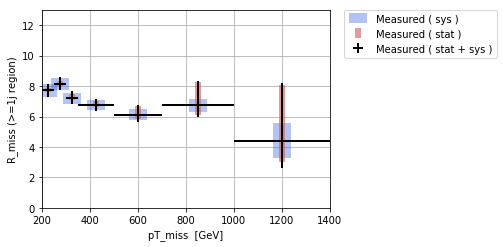

In [4]:
my_tables.plot("R_pT_miss_geq1j_meas",ylabel="R_miss (>=1j region)",xlabel="pT_miss  [GeV]",label="Measured",xlim=[200,1400],ylim=[0,13])

#### ... or take ratios...

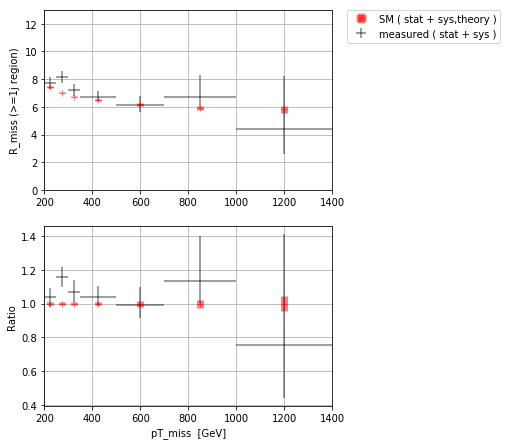

In [5]:
my_tables.plot_ratio("R_pT_miss_geq1j_meas","R_pT_miss_geq1j_exp",numerator_label="measured",denominator_label="SM",ylabel="R_miss (>=1j region)",xlabel="pT_miss  [GeV]",ylim=[0,13])

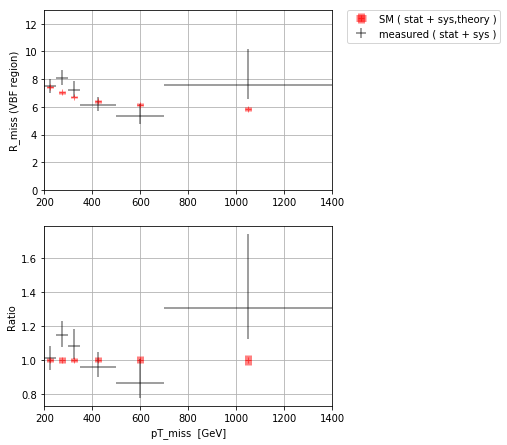

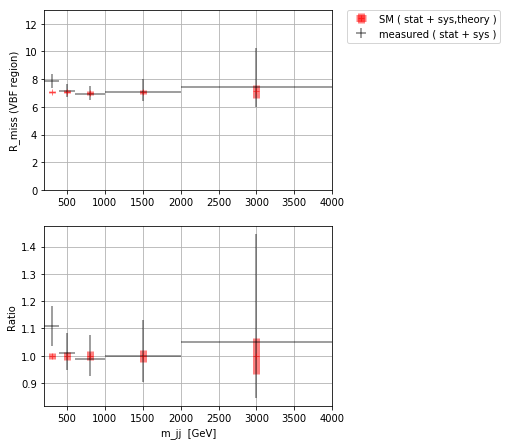

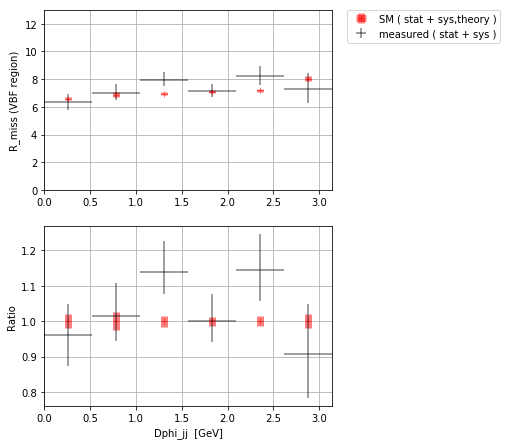

In [6]:
my_tables.plot_ratio("R_pT_miss_VBF_meas","R_pT_miss_VBF_exp",numerator_label="measured",denominator_label="SM",ylabel="R_miss (VBF region)",xlabel="pT_miss  [GeV]",ylim=[0,13])
my_tables.plot_ratio("R_m_jj_VBF_meas","R_m_jj_VBF_exp",numerator_label="measured",denominator_label="SM",ylabel="R_miss (VBF region)",xlabel="m_jj  [GeV]",ylim=[0,13])
my_tables.plot_ratio("R_dphi_jj_VBF_meas","R_dphi_jj_VBF_exp",numerator_label="measured",denominator_label="SM",ylabel="R_miss (VBF region)",xlabel="Dphi_jj  [GeV]",ylim=[0,13])

#### ... or plot 2D distributions...

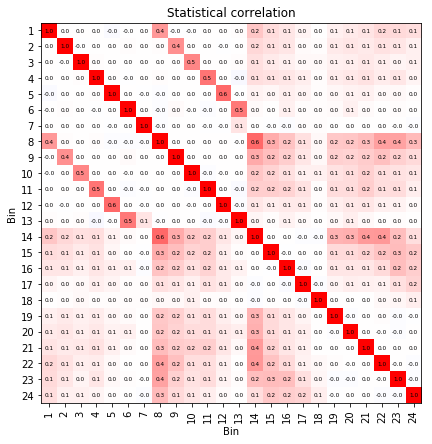

In [7]:
my_tables.plot("stat_corr",title="Statistical correlation",flt_precision=1)

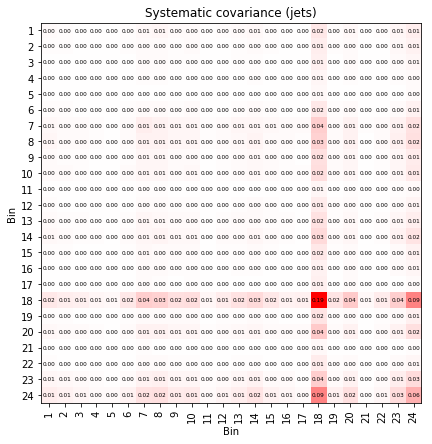

In [8]:
my_tables.plot("syst_cov_jets",title="Systematic covariance (jets)",flt_precision=2)

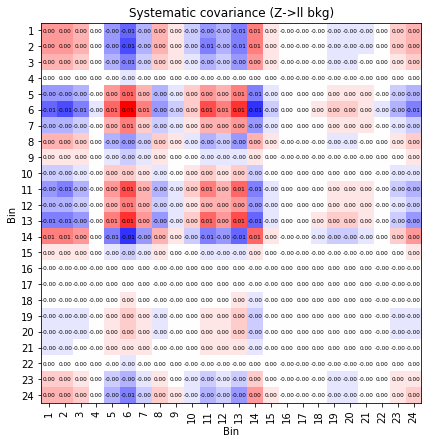

In [9]:
my_tables.plot("syst_cov_Z->ll_bkg",title="Systematic covariance (Z->ll bkg)",flt_precision=2)

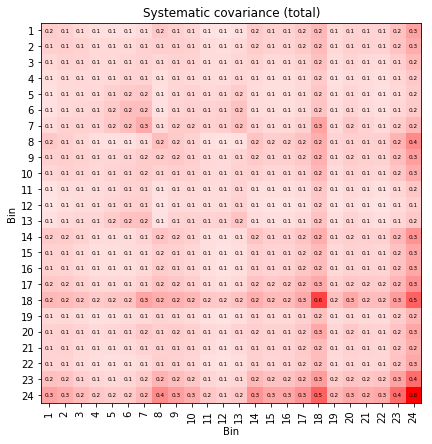

In [10]:
my_tables.plot("syst_cov_total",title="Systematic covariance (total)",flt_precision=1)

#### Since our distributions and covariances are now stored in appropriate numpy arrays, it is easy-ish to calculate things like chi2. N.B. if they weren't already available, it would take a little work to construct diagonal covariance matrices from the distribution errors, but this is pretty trivial. Here we ignore the uncertainty on the SM prediction, but this could be included through linear addition of a diagonal covariance matrix

In [11]:
import numpy as np
measurements = np.concatenate ( (my_tables["R_pT_miss_geq1j_meas"].values() , my_tables["R_pT_miss_VBF_meas"].values() , my_tables["R_m_jj_VBF_meas"].values() , my_tables["R_dphi_jj_VBF_meas"].values()) )
SM_pred = np.concatenate ( (my_tables["R_pT_miss_geq1j_exp"].values() , my_tables["R_pT_miss_VBF_exp"].values() , my_tables["R_m_jj_VBF_exp"].values() , my_tables["R_dphi_jj_VBF_exp"].values()) )
residual = measurements - SM_pred
print("MEASUREMENTS  =  ",measurements,"\n\nSM  =  ",SM_pred,"\n\nResidual  =  ",residual)

MEASUREMENTS  =   [7.71 8.12 7.21 6.74 6.12 6.74 4.4  7.5  8.06 7.21 6.13 5.32 7.61 7.86
 7.15 6.93 7.05 7.46 6.35 6.98 7.91 7.11 8.21 7.29] 

SM  =   [7.44 7.03 6.73 6.48 6.18 5.94 5.83 7.42 7.04 6.68 6.4  6.16 5.84 7.09
 7.09 7.   7.06 7.11 6.6  6.88 6.94 7.1  7.18 8.03] 

Residual  =   [ 0.27  1.09  0.48  0.26 -0.06  0.8  -1.43  0.08  1.02  0.53 -0.27 -0.84
  1.77  0.77  0.06 -0.07 -0.01  0.35 -0.25  0.1   0.97  0.01  1.03 -0.74]


In [12]:
covariance = my_tables["stat_cov"].values() + my_tables["syst_cov_total"].values()
#print("COVARIANCE  =  ",covariance)

In [13]:
chi2 = residual.transpose().dot ( np.linalg.inv(covariance).dot(residual) )
print("The chi2 of the four distributions is {0:.2f}".format(chi2))
import scipy
import scipy.stats as stats
print("The Prob(chi2>{0:.2f}|ndof={1}) is {2:.2f}".format(chi2,len(measurements),stats.chi2.sf(chi2,len(measurements))))

The chi2 of the four distributions is 32.21
The Prob(chi2>32.21|ndof=24) is 0.12


#### We can also fit for parameters if we want to. For example, let's say I have a BSM signal which does not interfere with the SM. Then...

In [14]:
pT_miss_geq1_BSM = [ 0.1 , 0.1 , 0.1 , 0.2 , 0.3 , 0.7 , 1.5 ]
pT_miss_VBF_BSM = [ 0.1 , 0.1 , 0.2 , 0.2 , 0.3 , 0.4 ]
m_jj_VBF_BSM = [ 0.3 , 0.1 , 0. , 0.7 , 0.1  ]
dphi_jj_VBF_BSM = [ 0.4 , 0.2 , 0.1 , 0.1 , 0.3 , 0.4 ]
BSM_pred = np.concatenate((pT_miss_geq1_BSM,pT_miss_VBF_BSM,m_jj_VBF_BSM,dphi_jj_VBF_BSM))
def chi2_func ( p ) :
    total_pred = SM_pred + p[0]*BSM_pred
    res = total_pred - measurements
    return res.transpose().dot( np.linalg.inv(covariance).dot(res) )
params = np.array([1.])
best_chi2 = scipy.optimize.minimize(chi2_func, params,method='nelder-mead',options={'xtol': 1e-8, 'disp': True})
print(best_chi2)
y_best = best_chi2["fun"]
x_best = best_chi2["x"][0]

Optimization terminated successfully.
         Current function value: 31.542997
         Iterations: 29
         Function evaluations: 59
 final_simplex: (array([[0.42539687],
       [0.42539688]]), array([31.54299712, 31.54299712]))
           fun: 31.542997121444415
       message: 'Optimization terminated successfully.'
          nfev: 59
           nit: 29
        status: 0
       success: True
             x: array([0.42539687])


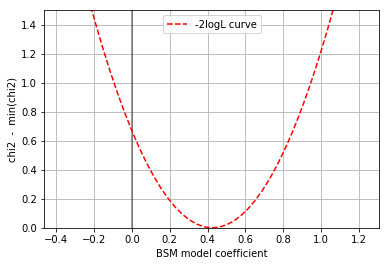

In [15]:
x = [x_best*(-0.9+0.09*i) for i in range(43)]
y = [chi2_func([x[i]]) for i in range(43)]
y = y - y_best
import matplotlib.pyplot as plt
plt.plot(np.linspace(0,0,2), np.linspace(0, 1.5, 2), c='k', alpha=0.5)
plt.plot(x,y,"--",color='r',label="-2logL curve")
plt.xlabel("BSM model coefficient")
plt.ylabel("chi2  -  min(chi2)")
plt.ylim(0,1.5)
plt.legend(loc="upper center")
plt.grid()
plt.show()

In [16]:
param_err_down = x_best - [ mu for mu,val in zip(x,y) if val < 1][0]
param_err_up = [ mu for mu,val in zip(x,y) if val < 1].pop() - x_best
print("BSM model coefficient is {0:.2f} + {1:.2f} - {2:.2f}".format(x_best,param_err_up,param_err_down))

BSM model coefficient is 0.43 + 0.49 - 0.50
